In [5]:
from krxns.config import filepaths
from krxns.utils import str2int
import numpy as np
import matplotlib.pyplot as plt
import json

In [11]:
whitelist_fn = "top_25_whitelist"
rxns_fn = "sprhea_240310_v3_mapped"
atom_lb = 0.2
multi_nodes = True
ds = 1_000
strategy = 'greedy-tanimoto'
max_steps = 50

In [12]:
with open(
    filepaths["results"] / "graph_traversal" / f"{rxns_fn}" / f"traversed_paths_{strategy}_max_steps_{max_steps}_{whitelist_fn}_atom_lb_{int(atom_lb * 100)}p_multi_nodes_{multi_nodes}_ds_{ds}.json",
    'r'
    ) as f:
    traversed = str2int(json.load(f))

In [13]:
reached = {}
n_pairs = 0
for i in traversed:
    for j in traversed[i]:
        n_pairs += 1
        if traversed[i][j][-1] == j:
            reached[(i, j)] = traversed[i][j]

print(f"{len(reached)} / {n_pairs} = {len(reached) / n_pairs}")

28 / 6406 = 0.004370902279113331


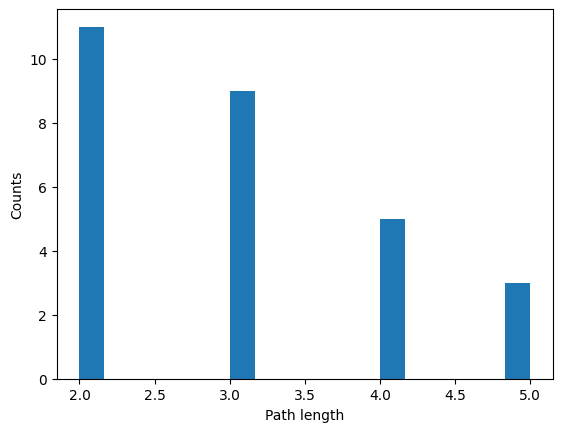

In [14]:
flat_lens = [len(p) for p in reached.values()]
fig, ax = plt.subplots()
ax.hist(flat_lens, bins=18)
ax.set_ylabel("Counts")
ax.set_xlabel("Path length")
plt.show()